In [17]:
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)

In [3]:
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [4]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [5]:
28 * 28 

784

In [24]:
X_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values

In [60]:
y_test = df_test.iloc[:, 0].values

In [8]:
X_train.shape

(60000, 784)

In [25]:
X_train.max(), X_train.min()

(255, 0)

In [11]:
type(X_train)

numpy.ndarray

In [13]:
a = X_train.flatten()

In [14]:
len(a)

47040000

In [15]:
60000 * 784

47040000

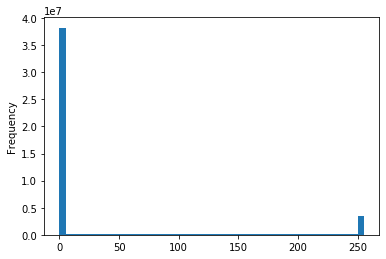

In [19]:
pd.Series(a).plot.hist(bins = 50)

In [21]:
len(a[a==0])/len(a)

0.8087977040816327

In [23]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [27]:
X_train = df_train.iloc[:, 1:].values/255
y_train = df_train.iloc[:, 0].values

In [28]:
X_train.dtype

dtype('float64')

In [29]:
import sys

In [30]:
sys.getsizeof(X_train)

376320112

In [59]:
X_train = df_train.iloc[:, 1:].values/255
X_test = df_test.iloc[:, 1:].values/255

In [32]:
X_train = X_train.astype("uint8")

In [33]:
X_train.dtype

dtype('uint8')

In [34]:
sys.getsizeof(X_train)

47040112

In [36]:
376320112/47040112

7.999983333373016

In [39]:
X_train[0].shape

(784,)

In [41]:
X_train[0].reshape((28, 28)).shape

(28, 28)

In [139]:
X_train = df_train.iloc[:, 1:].values/255
X_test = df_test.iloc[:, 1:].values/255

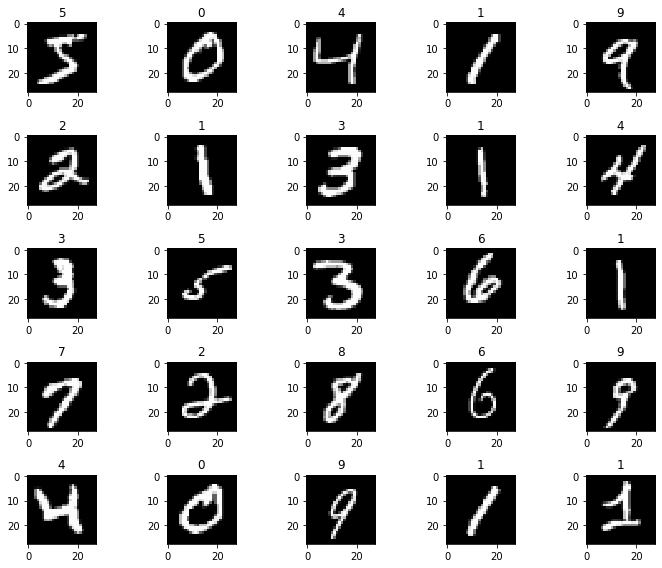

In [51]:
fig, axes = plt.subplots(5, 5, figsize = (10, 8))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape((28, 28)), cmap="gray")
    ax.set_title(y_train[i])
    
plt.tight_layout()

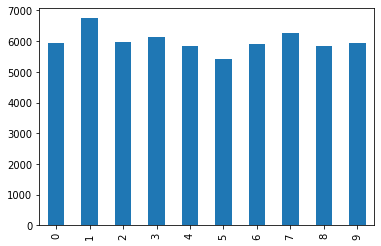

In [50]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

In [52]:
from sklearn import * 

In [66]:
est = linear_model.SGDClassifier(loss="log", alpha=0.1, penalty="l2", n_jobs = 8
                    , max_iter=1000, random_state=34, learning_rate="invscaling", eta0 = 0.01)

In [67]:
%%time 
est.fit(X_train, y_train)

CPU times: user 17 s, sys: 137 ms, total: 17.2 s
Wall time: 3.64 s


SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.01, fit_intercept=True, l1_ratio=0.15,
              learning_rate='invscaling', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=8, penalty='l2', power_t=0.5,
              random_state=34, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [68]:
est.n_iter_

16

In [69]:
y_train_pred = est.predict(X_train)

In [70]:
y_test_pred = est.predict(X_test)

In [71]:
metrics.accuracy_score(y_train, y_train_pred)

0.8494666666666667

In [72]:
metrics.accuracy_score(y_test, y_test_pred)

0.8567

In [74]:
y_test_prob = est.predict_proba(X_test)

In [75]:
y_test_prob.shape

(10000, 10)

In [76]:
y_test_prob[0]

array([0.05425586, 0.01719748, 0.04826791, 0.07164087, 0.04870429,
       0.03906757, 0.01586605, 0.53261402, 0.04855191, 0.12383404])

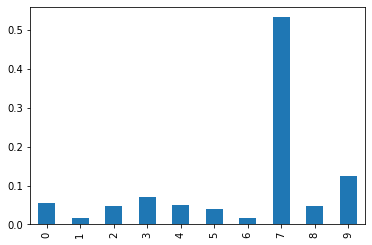

In [77]:
pd.Series(y_test_prob[0]).plot.bar()

In [78]:
y_test_pred[0]

7

In [79]:
metrics.log_loss(y_test, y_test_prob)

0.9177177167735101

In [80]:
import tensorflow as tf

In [87]:
a = tf.constant(2.0, name = "a")

In [88]:
a

<tf.Tensor 'a:0' shape=() dtype=float32>

In [97]:
b = tf.constant(3.0, name = "b")

In [98]:
b

<tf.Tensor 'b_2:0' shape=() dtype=float32>

In [95]:
c = tf.constant(2.0, name = "c")

In [96]:
c

<tf.Tensor 'c:0' shape=() dtype=float32>

In [99]:
d = a + b

In [100]:
d

<tf.Tensor 'add:0' shape=() dtype=float32>

In [102]:
with tf.Session() as sess:
    d_ = sess.run(d)
    print(d_)

5.0


In [106]:
def multiply(a, b):
    a_ = tf.placeholder(tf.float32)
    b_ = tf.placeholder(tf.float32)
    c = a_ * b_
    with tf.Session() as session:
        args = {a_: a, b_: b}
        c_ = session.run([c], feed_dict=args)
        return c_
    
multiply(2.3, 10)

[23.0]

In [118]:
def multiply(a, b):
    a_ = tf.placeholder(tf.float32, shape=(3, 1))
    b_ = tf.placeholder(tf.float32, shape=(3, 1))
    c = tf.matmul(tf.transpose(a_), b_)
    d = tf.add(a_, b_)
    with tf.Session() as session:
        args = {a_: a, b_: b}
        c_, d_ = session.run([c, d], feed_dict=args)
        return c_, d_
    
c_, d_ = multiply(np.array([[1.0, 2.0, 3.0]]).T, np.array([[1.0, 0.0, -1.0]]).T)

In [119]:
c_

array([[-2.]], dtype=float32)

In [120]:
d_

array([[2.],
       [2.],
       [2.]], dtype=float32)

In [111]:
import numpy as np

In [112]:
np.array([[1.0, 2.0, 3.0]]).T

array([[1.],
       [2.],
       [3.]])

In [113]:
np.array([[1.0, 0.0, -1.0]]).T

array([[ 1.],
       [ 0.],
       [-1.]])

In [124]:
y_train.shape

(60000,)

In [126]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

Y_train.shape

(60000, 10)

In [127]:
Y_train[:3, :]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [129]:
y_train[:3]

array([5, 0, 4])

In [132]:
from tensorflow import keras
from time import time 

In [138]:
tensorfboard = keras.callbacks.TensorBoard(log_dir="/tmp/tboard/%d" % time())


model = keras.Sequential([
    keras.layers.InputLayer((784, )), 
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.SGD(lr=0.01)
              , loss=keras.losses.categorical_crossentropy
              , metrics=["accuracy"])

model.summary()


model.fit(X_train, Y_train, batch_size=32, epochs=20, callbacks=[tensorfboard])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.6559 - acc: 0.8346
Epoch 2/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3394 - acc: 0.9057
Epoch 3/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2903 - acc: 0.9179
Epoch 4/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2602 - acc: 0.9267
Epoch 5/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2374 - acc: 0.9335
Epoch 6/20
60000/60000 [